## Tarea 10.7

Considere la ecuación diferencial que se ha resuelto en los ejemplos de clase:

$$
y'(t) = y(t) - t^2 + 1\,,\quad 0 \leq t \leq 2\,,
$$

pero ahora con una condición inicial

$$
y(0) = 0.5 + \delta_o
$$

donde $\delta_o$ es un error cometido al fijar la condición.

* Resuelva esta ecuación usando el método de Euler con una precisión de $10^{-4}$. Considere varios valores de $\delta_o$ entre $-0.1$ y $0.1$ y grafique $y(2)$ en función de $\delta_o$. 

* Compare su resultado con el valor de $y(2)$ obtenido de la solución analítica $y(t) = (t + 1)^2 - 0.5e^t$. Comente.

### Solución:

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def euler(f, a, b, yo, N):
    
    h = (b-a)/N
    t = a
    w = yo
    ts = np.zeros(N+1)
    sol = np.zeros(N+1)
    
    for i in range(N):
        ts[i] = t
        sol[i] = w
        w = w + h*f(t, w)
        t = t + h
        
    ts[N] = t
    sol[N] = w
    
    return ts, sol

In [21]:
num = 10000
varios = np.linspace(-0.1, 0.1, num)
def f(t, y):
    return y - t**2 + 1

euler(f, 0, 2, 0.5, 10)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 array([0.5       , 0.8       , 1.152     , 1.5504    , 1.98848   ,
        2.458176  , 2.9498112 , 3.45177344, 3.95012813, 4.42815375,
        4.8657845 ]))

In [22]:
e1=euler(f, 0, 2, 0.5 + varios[0], num)
e2=euler(f, 0, 2, 0.5 + varios[1], num)
e3=euler(f, 0, 2, 0.5 + varios[2], num)
e4=euler(f, 0, 2, 0.5 + varios[-1], num)
e5=euler(f, 0, 2, 0.5 + varios[4], num)
e6=euler(f, 0, 2, 0.5 + varios[2050], num)
e7=euler(f, 0, 2, 0.5 + varios[6], num)
e8=euler(f, 0, 2, 0.5 + varios[7], num)
e9=euler(f, 0, 2,( 0.5 + varios[4999]), num)

In [23]:
exacto2=(2+1)**2 -((0.5)*np.exp(2))
exacto2

5.305471950534675

In [24]:
e9[0].shape

(10001,)

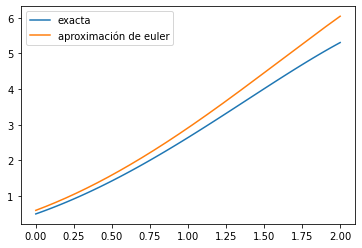

In [25]:
ts1 = np.linspace(0,2,100)
plt.plot(ts1, (ts1+1)**2 -0.5*np.exp(ts1), label ='exacta')
plt.plot(*e4, label='aproximación de euler')
plt.legend()

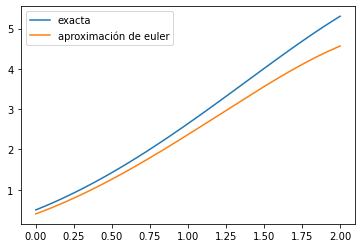

In [26]:
ts1 = np.linspace(0,2,100)
plt.plot(ts1, (ts1+1)**2 -0.5*np.exp(ts1), label ='exacta')
plt.plot(*e1, label='aproximación de euler')
plt.legend()

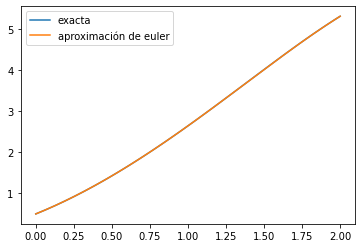

In [27]:
ts1 = np.linspace(0,2,100)
plt.plot(ts1, (ts1+1)**2 -0.5*np.exp(ts1), label ='exacta')
plt.plot(*e9, label='aproximación de euler')
plt.legend()

Apreciamos que la aproximación de Euler mejora a medida que el error condicional del valor inicial es menor, lo cual tiene mucho sentido. De esta misma manera el error corta por arriba o por abajo dependiendo del valor extremo de $\delta_o$ que ocupemos $[-0.1, 0.1]$.

In [28]:
e_9= e9[1:]

In [29]:
e_99 = np.array(e_9)

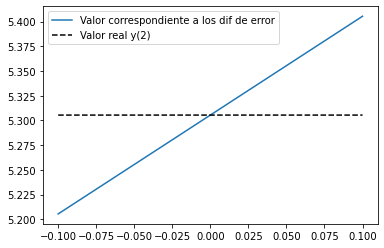

In [30]:
ts1 = np.linspace(-0.1,0.1,10000)
exac_2 = np.zeros(num) + exacto2
plt.plot(ts1, exacto2 + ts1, label='Valor correspondiente a los dif de error')
plt.plot(ts1, exac_2, linestyle='--', color='black', label='Valor real y(2)')
plt.legend()

Se aprecia que el valor intermedio de este "error condicional" es el que mas se acerca al valor real de la solución.

In [31]:
exacto1 = np.abs(exacto2 - e_99[0, -1])
print(exacto1)

0.0006126656624090288


Se puede apreciar que el error es del orden $10^{-4}$ cuando tomamos un error de condicional cercano al $| 0.0| $ si tomamos un error condicionante cercano a los extremos, nuestro error también aumenta de manera linal como podemos apreciar en el gráfico.

# Calificación: 7.0